## Analysis of Metropolis sampling 

for Ensemble Refinement or Force-Field Fitting, with/without Jeffreys prior

In [1]:
import os
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
root_path = '../Results/'
dir_list = os.listdir(root_path)

In [5]:
class class_my_results():
    def __init__(self, folder_path):
        self.ene = np.load(folder_path + '/energy.npy')
        self.traj = np.load(folder_path + '/trajectory.npy')
        filename = folder_path + '/par_values'

        f = open(filename)
        header = f.readline().split(',')[1:]
        vals = f.readline().split(',')[1:]

        self.info = dict(zip(header, vals))

### Ensemble Refinement

In [2]:
# select sampling for Ensemble Refinement
dir_list = [s for s in dir_list if s[:17] == 'Result_2024_12_07']

In [4]:
my_results = {}

for i in range(len(dir_list)):

    folder_path = root_path + dir_list[i]

    my_results[i] = class_my_results(folder_path)

from 1 to 8:

alpha = 1, stride = 100, dlambda = 0.1, n_steps = 1e5

reduced (namely, just two observables)
- 3 is: normalize? No, Jeffreys? No
- 4 is: normalize? Yes, Jeffreys? No
- 5 is: normalize? Yes, Jeffreys? Yes
- 6 is: normalize? No, Jeffreys? Yes

non-reduced (namely, all the backbone gamma 3J couplings)

- 1 is: normalize? No, Jeffreys? No
- 2 is: normalize? Yes, Jeffreys? No
- 7 is: normalize? No, Jeffreys? Yes
- 8 is: normalize? Yes, Jeffreys? Yes

av. acceptance > 0.6

In [5]:
my_results[8].info

{'stride': '100.0',
 'alpha ER': '1.0',
 'normalize?': '1.0',
 'reduce?': '0.0',
 'Jeffreys?': '1.0',
 'dlambda': '0.1',
 'n_steps': '100000.0',
 'av. acceptance\n': '0.82664\n'}

In [6]:
my_results[2].info

{'stride': '100.0',
 'alpha ER': '1.0',
 'normalize?': '1.0',
 'reduce?': '0.0',
 'Jeffreys?': '0.0',
 'dlambda': '0.1',
 'n_steps': '100000.0',
 'av. acceptance\n': '0.96301\n'}

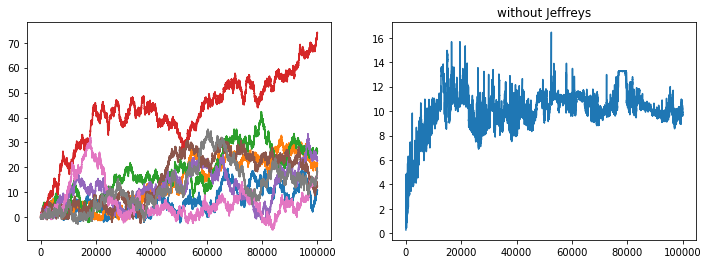

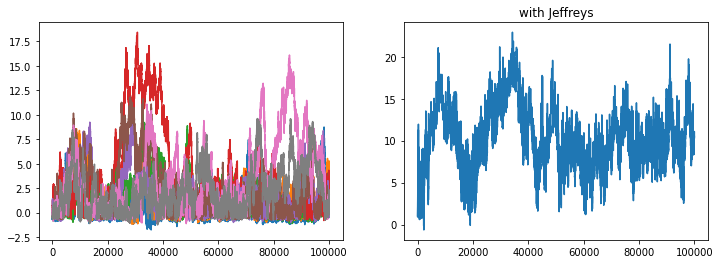

In [7]:
# compare 1 with 7 or 2 with 8

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(my_results[2].traj, '-')
axs[1].plot(my_results[2].ene, '-')
plt.title('without Jeffreys')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(my_results[8].traj, '-')
axs[1].plot(my_results[8].ene, '-')
plt.title('with Jeffreys')
plt.show()

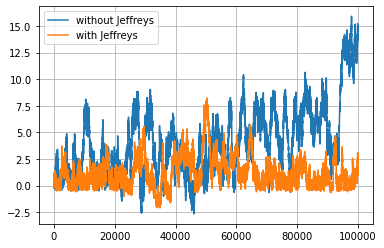

In [7]:
j = 2

plt.plot(my_results[1].traj[:, j], '-', label='without Jeffreys')
plt.plot(my_results[7].traj[:, j], '-', label='with Jeffreys')
plt.grid()
plt.legend()

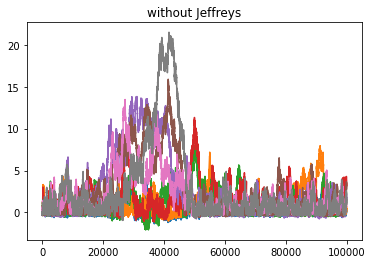

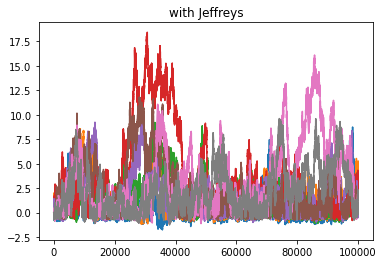

In [8]:
# compare 1 with 2 or 7 with 8

plt.plot(my_results[7].traj, '-')
plt.title('without Jeffreys')
plt.show()

plt.figure()
plt.plot(my_results[8].traj, '-')
plt.title('with Jeffreys')
plt.show()

useless since lambdas are different (mapped one into the other through normalization)

- estimate the error with block analysis (or bootstrap or jack-knife)

In [9]:
from basic_functions import block_analysis

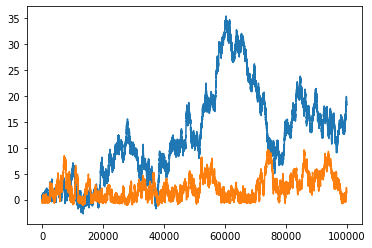

In [36]:
j = 7

time_series_noJ = my_results[2].traj[:, j]
# time_series = my_results[2].ene

time_series_J = my_results[8].traj[:, j]
# time_series = my_results[8].ene

plt.plot(time_series_noJ)
plt.plot(time_series_J)


In [37]:
out_noJ = block_analysis(time_series_noJ, delta=100)
out_J = block_analysis(time_series_J, delta=100)

In [38]:
print(out_noJ[0], out_noJ[1])
print(out_J[0], out_J[1])

12.093363198771499 0.027543730117998794
2.205527748316878 0.007038643006341273


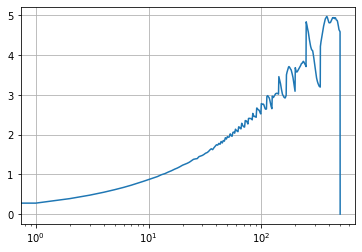

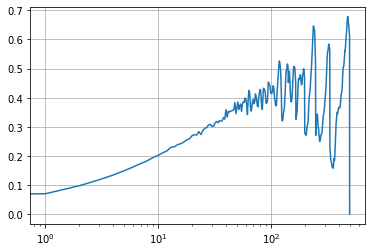

In [39]:
plt.plot(out_noJ[2], '-')
plt.xscale('log')
plt.grid()

plt.figure()
plt.plot(out_J[2], '-')
plt.xscale('log')
plt.grid()

### Force-field fitting

In [4]:
# select sampling for Ensemble Refinement
dir_list = [s for s in dir_list if s[:17] == 'Result_2024_12_13']

In [6]:
my_results = {}

for i in range(len(dir_list)):

    folder_path = root_path + dir_list[i]

    my_results[i] = class_my_results(folder_path)

In [11]:
my_results[0].info

{'stride': '100.0',
 'beta FFF': '1.0',
 'normalize?': '0.0',
 'reduce?': '1.0',
 'Jeffreys?': '0.0',
 'dlambda': '0.3',
 'n_steps': '10000.0',
 'av. acceptance\n': '0.9803\n'}

In [18]:
my_results[6].info

{'stride': '100.0',
 'beta FFF': '1.0',
 'normalize?': '0.0',
 'reduce?': '1.0',
 'Jeffreys?': '1.0',
 'dlambda': '0.3',
 'n_steps': '10000.0',
 'av. acceptance\n': '0.9785\n'}

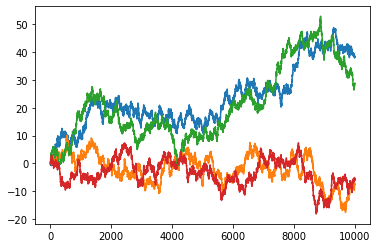

In [19]:
plt.plot(my_results[0].traj)

plt.plot(my_results[6].traj)